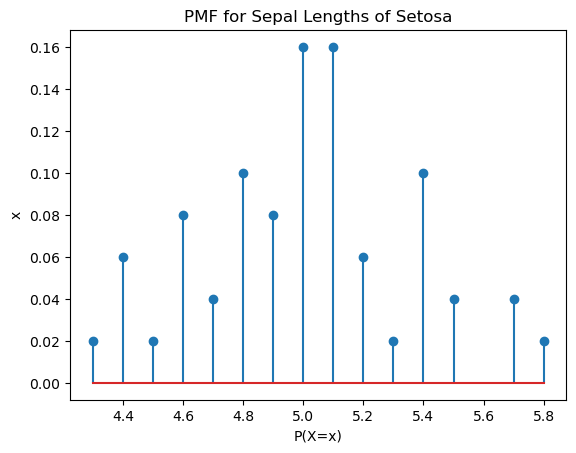

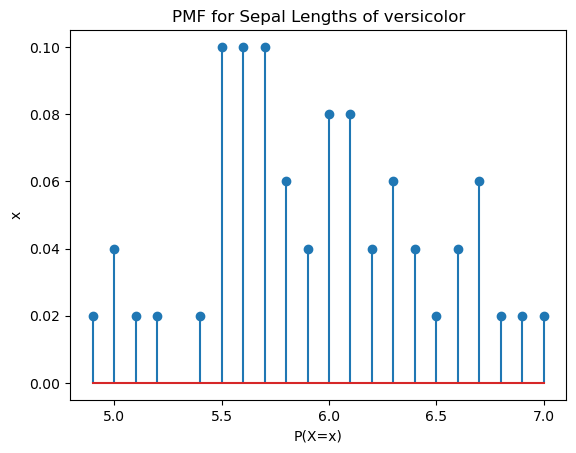

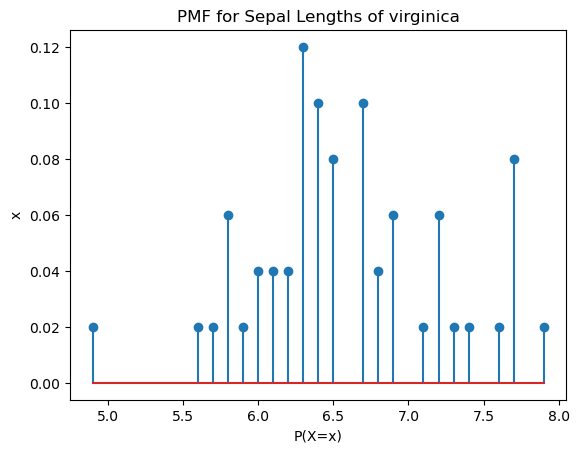

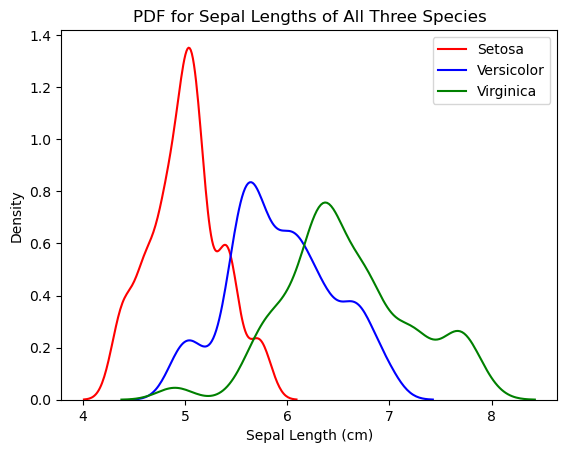

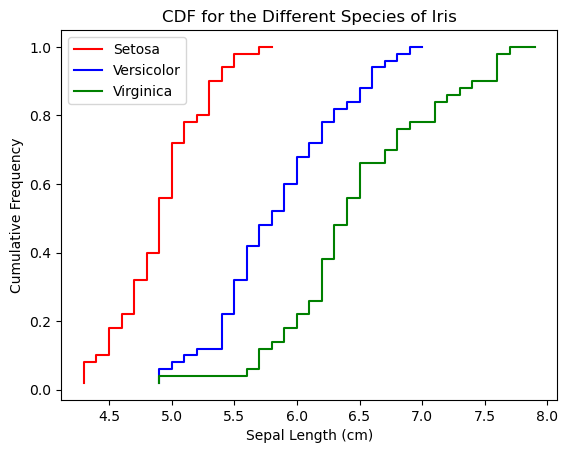

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
df = iris.data
df['label'] = iris.target  # directly assigning the target labels

df = pd.read_csv("iris.csv")
df.head()

df.describe()

from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris(as_frame=True)

# Create a DataFrame with only the features
df = iris.data

# Replace numeric target values with their corresponding species names
df['label'] = iris.target
df['label'] = df['label'].replace({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

# Select only sepal length and the corresponding label
df = df[['sepal length (cm)', 'label']]

# we will create proability distribution uniquely for each 
df_setosa = df[df['label'] == 'setosa']
df_versicolor = df[df['label']== 'versicolor']
df_virginica = df[df['label'] == 'virginica']

# generating pmf is easy, we will create a frequency map, counting the frequencies 
from matplotlib import pyplot as plt 
def generate_pmf(df, plot_title, x_label, y_label):
    # get the frequencies for each sepal lengths -
    N = len(df)
    f_map = df['sepal length (cm)'].value_counts()
    f_map[f_map.index] = f_map[f_map.index] / N

    plt.stem(f_map.index, f_map.values)
    # plt.xticks(f_map.index) # Ensure all points are displayed
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

generate_pmf(df_setosa, "PMF for Sepal Lengths of Setosa", "P(X=x)", "x")
generate_pmf(df_versicolor, "PMF for Sepal Lengths of versicolor", "P(X=x)", "x")
generate_pmf(df_virginica, "PMF for Sepal Lengths of virginica", "P(X=x)", "x")

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for each species
df_setosa = df[df['label'] == 'setosa']
df_versicolor = df[df['label'] == 'versicolor']
df_virginica = df[df['label'] == 'virginica']

# KDE plot for each species
sns.kdeplot(df_setosa['sepal length (cm)'].values, bw_adjust=0.6, color='red', label='Setosa')
sns.kdeplot(df_versicolor['sepal length (cm)'].values, bw_adjust=0.6, color='blue', label='Versicolor')
sns.kdeplot(df_virginica['sepal length (cm)'].values, bw_adjust=0.6, color='green', label='Virginica')

# Set plot title and labels
plt.title('PDF for Sepal Lengths of All Three Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.legend()  # Corrected legend function
plt.show()

import matplotlib.pyplot as plt

# Function to calculate the cumulative frequencies
def get_cumulative(df):
    N = len(df)
    f_map = df['sepal length (cm)'].value_counts()
    f_map = f_map / N  # Normalize frequencies
    f_map = f_map.sort_index()  # Sort by index (sepal length values)
    f_map = f_map.cumsum()  # Calculate cumulative sum
    return f_map

# Plot CDFs for each species
plt.step(get_cumulative(df_setosa).index, get_cumulative(df_setosa).values, label='Setosa', color='red')
plt.step(get_cumulative(df_versicolor).index, get_cumulative(df_versicolor).values, label='Versicolor', color='blue')
plt.step(get_cumulative(df_virginica).index, get_cumulative(df_virginica).values, label='Virginica', color='green')

# Set title and axis labels
plt.title("CDF for the Different Species of Iris")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Cumulative Frequency")

# Add legend
plt.legend()

# Display the plot
plt.show()

